In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

import copy
from sklearn.cross_validation import train_test_split

from sklearn import linear_model
from sklearn import metrics
from sklearn import multiclass
from sklearn import svm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
x_test_original = np.load("../../../data/X_test_DOF.npy")
y_test_original = np.load("../../../data/Y_test_DOF.npy")
x_train_original = np.load("../../../data/X_train_DOF.npy")
y_train_original = np.load("../../../data/Y_train_DOF.npy")

In [26]:
x_test_videos_t = np.load("../../../data/X_test_videos_DOF.npy")
x_test_videos = np.array(np.zeros( shape = (len(x_test_videos_t)) , dtype='uint8'))
for index in range(len(x_test_videos_t)):
    x_test_videos[index] = x_test_videos_t[index]

In [27]:
x_train = np.array(np.zeros( shape = (len(x_train_original),230400) , dtype='uint8'))
y_train = np.array(np.zeros( shape = (len(y_train_original)) , dtype='uint8'))
for index in range(len(y_train_original)):
    x_train[index] = x_train_original[index].reshape(230400)
    y_train[index] = y_train_original[index]

In [28]:
x_test = np.array(np.zeros( shape = (len(x_test_original),230400) , dtype='uint8'))
y_test = np.array(np.zeros( shape = (len(y_test_original)) , dtype='uint8'))
for index in range(len(y_test_original)):
    x_test[index] = x_test_original[index].reshape(230400)
    y_test[index] = y_test_original[index]

In [ ]:
model = multiclass.OneVsRestClassifier(svm.SVC(kernel = "linear"))
##model.fit(x_train.reshape(len(x_train), 1), y_train)
model.fit(x_train, y_train)
p = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, p)
print accuracy

In [13]:
p = model.predict(x_test)

In [17]:
predictions = np.array(np.zeros(shape = (3) , dtype = 'uint8'))
start = 0
for index in range(len(p)):
    predictions[p[index]] += 1
    if index + 1 < len(p):
        if x_test_videos[index] != x_test_videos[index + 1]:
            p[start : index + 1] = np.argmax(predictions)
            start = index + 1
            predictions = np.zeros(shape = (3) , dtype = 'uint8')
p[start : index] = np.argmax(predictions)

In [14]:
print p[:10]
print y_test[:10]

[2 2 2 1 2 2 1 1 1 2]
[1 1 1 1 1 1 1 1 1 1]


In [18]:
p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [11]:
len(p)

262

In [12]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [16]:
x_test_videos

array([190, 190, 190, 190, 190, 190,   6,   6,   6,   6,   6,  79,  79,
        79,  79,  79, 205, 205, 205, 205, 205, 117, 117, 117, 117, 117,
       185, 185, 185, 185, 185, 201, 201, 201, 201, 201, 167, 167, 167,
       167, 167,   9,   9,   9,   9,   9,  30,  30,  30,  30,  30, 180,
       180, 180, 180, 180, 220, 220, 220, 220, 220, 220, 228, 228, 228,
       228, 228, 216, 216, 216, 216, 216, 136, 136, 136, 136, 136,  68,
        68,  68,  68,  68, 198, 198, 198, 198, 198,  15,  15,  15,  15,
        15,  96,  96,  96,  96,  96,  24,  24,  24,  24,  24, 233, 233,
       233, 233, 233,  19,  19,  19,  19,  19, 120, 120, 120, 120, 120,
       152, 152, 152, 152, 152,  33,  33,  33,  33,  33, 124, 124, 124,
       124, 124, 251, 251, 251, 251, 251, 251, 242, 242, 242, 242, 242,
        10,  10,  10,  10,  10, 164, 164, 164, 164, 164, 184, 184, 184,
       184, 184,  97,  97,  97,  97,  97, 148, 148, 148, 148, 148, 209,
       209, 209, 209, 221, 221, 221, 221, 221,  25,  25,  25,  2

In [19]:
accuracy = metrics.accuracy_score(y_test, p)
print accuracy

0.885496183206


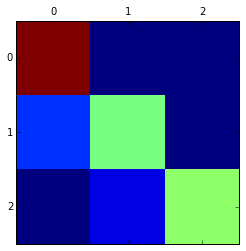

In [20]:
from matplotlib.pylab import *
confusion_matrix = metrics.confusion_matrix(y_test, p)
matshow(confusion_matrix)

In [22]:
confusion_matrix

array([[115,   0,   0],
       [ 20,  57,   0],
       [  0,  10,  60]])

In [23]:
np.sum(confusion_matrix, axis=1)
confusion_matrix /  np.sum(confusion_matrix, axis=1).astype('float')

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.17391304,  0.74025974,  0.        ],
       [ 0.        ,  0.12987013,  0.85714286]])